In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

### Import dataset

In [35]:
df = pd.read_csv('base500k2.csv')

In [36]:
# Select Subset of columns
df_clean = df[['age', 'sex31', 'height50', 'own_rent680',
             'ppl_in_household709', 'household_income738', 'grad_age845',
             'alcohol_freq1558', 'health_rating2178', 'disability2188', 
             'past_fall2296', 'operation2415', 'hearing_aid2293', 'visual_impair6148',
             'employed6142', 'mild_depress_age20434', 'BMI21001', 'family_dementia20107',
             'family_parki20107', 'family_severe_depression20107', 'months_btw_Fall']]

# display(df_new)

### Data Cleaning

In [37]:
df_clean = df_clean.copy()

# Map own_rent to Own or not_own
df_clean['own_rent680'] = df_clean["own_rent680"].map(lambda x: 1 if x == 1  else 0)

# Median Imputation - ppl_in_household709, household_income738, grad_age845
df_clean['ppl_in_household709'] = df_clean['ppl_in_household709'].fillna((df['ppl_in_household709'].median()))
df_clean['household_income738'] = df_clean['household_income738'].fillna((df['household_income738'].median()))
df_clean['grad_age845'] = df_clean['grad_age845'].fillna((df['grad_age845'].median()))

# Drop Nan alcohol_freq1558
df_clean = df_clean.dropna(subset=['alcohol_freq1558'])

# Map disability2188 to yes=1 and no=0
df_clean['disability2188'] = df_clean['disability2188'].map(lambda x: 0 if x == 1  else 1)

# Map past_fall2296 to yes=1 and no=0
df_clean['past_fall2296'] = df_clean['past_fall2296'].map(lambda x: 0 if x == 1  else 1)

# Impute Nan to 0/ Median for operation2415, hearing_aid2293, visual_impair6148, health_rating2178
df_clean['operation2415'] = df_clean['operation2415'].fillna(0)
df_clean['hearing_aid2293'] = df_clean['hearing_aid2293'].fillna(0)
df_clean['visual_impair6148'] = df_clean['visual_impair6148'].fillna(0)
df_clean['health_rating2178'] = df_clean['health_rating2178'].fillna(df_clean['health_rating2178'].median())

# Map cataract5441 to yes=1 and no=0, only 13ppl == 1
# df_clean['cataract5441'] = df_clean['cataract5441'].fillna(0)
# df_clean['cataract5441'] = df_clean['cataract5441'].map(lambda x: 1 if x != 0  else 0)

# Drop Nan for glaucoma2137 as all are Nan
# df_clean = df_clean.drop(columns=['glaucoma2137'])

# Map employed6142 to 1=Employed, 2=Retired, 3=Housewife, 4=Unable to work, 5=Unemployed and others
df_clean['employed6142'] = df_clean['employed6142'].fillna(5)
df_clean['employed6142'] = df_clean['employed6142'].map(lambda x: 5 if x >= 5 else x)

# Map mild_depress_age20434 to 0=No, 1=yes
df_clean['mild_depress_age20434'] = df_clean['mild_depress_age20434'].fillna(0)
df_clean['mild_depress_age20434'] = df_clean['mild_depress_age20434'].map(lambda x: 1 if x >= 1 else x)

# Drop Nan, BMI21001
df_clean = df_clean.dropna(subset=['BMI21001'])

# Map Months Between Fall, if yes = 1, no = 0
df_clean['months_btw_Fall'] = df_clean['months_btw_Fall'].fillna(0)
df_clean['months_btw_Fall'] = df_clean['months_btw_Fall'].map(lambda x: 1 if x > 0 else 0).astype('int64')

df_clean.reset_index(drop=True)
# display(df_clean)

,age,sex31,height50,own_rent680,ppl_in_household709,household_income738,grad_age845,alcohol_freq1558,health_rating2178,disability2188,...,operation2415,hearing_aid2293,visual_impair6148,employed6142,mild_depress_age20434,BMI21001,family_dementia20107,family_parki20107,family_severe_depression20107,months_btw_Fall
2,63,1,173.0,1,2.0,3.0,16.0,2.0,3.0,0,...,1.0,1.0,0.0,2.0,0.0,21.0832,0,0,0,0
3,51,1,175.0,0,3.0,3.0,16.0,3.0,3.0,0,...,0.0,0.0,0.0,1.0,0.0,29.0939,0,0,0,0
4,59,0,168.0,0,2.0,3.0,16.0,3.0,2.0,1,...,0.0,0.0,0.0,2.0,1.0,26.1480,0,0,0,0
5,47,0,161.0,0,2.0,3.0,16.0,3.0,2.0,1,...,0.0,0.0,0.0,1.0,0.0,27.0437,0,0,0,0
6,64,0,172.0,1,3.0,1.0,15.0,3.0,2.0,1,...,0.0,0.0,0.0,2.0,0.0,27.7177,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502406,57,1,175.0,0,3.0,3.0,15.0,1.0,2.0,1,...,1.0,0.0,0.0,1.0,0.0,27.9184,0,0,0,0
502407,59,0,162.0,0,1.0,3.0,16.0,6.0,4.0,0,...,0.0,0.0,0.0,4.0,0.0,25.3391,0,0,0,0
502408,62,0,161.0,0,2.0,5.0,18.0,1.0,3.0,1,...,0.0,0.0,0.0,2.0,0.0,41.3564,0,0,0,0
502409,52,0,154.0,1,2.0,2.0,16.0,4.0,3.0,0,...,0.0,0.0,0.0,4.0,1.0,37.5274,0,0,0,0


In [39]:
# Split num_col and cat_col
num_col = ['age', 'height50', 'grad_age845', 'alcohol_freq1558', 'health_rating2178', 
             'employed6142', 'BMI21001']
cat_col = set(list(df_clean.columns)) - set(num_col)

num_col_idx = [df_clean.columns.get_loc(c) for c in df_clean.columns if c in num_col]
cat_col_idx = [df_clean.columns.get_loc(c) for c in df_clean.columns if c in cat_col]

### Model Training

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB

In [41]:
X = df_clean.drop(columns=['months_btw_Fall'])
y = df_clean['months_btw_Fall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
# Logistic Regression

preprocessor = ColumnTransformer([
    ('pipe_num', Pipeline([('scaler', StandardScaler())]), num_col)],
    remainder='passthrough')

lr_pipe = Pipeline([('preprocessor', preprocessor),
                 ('logistic_regression', LogisticRegression())])

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height50',
                                                   'grad_age845',
                                                   'alcohol_freq1558',
                                                   'health_rating2178',
                                                   'employed6142',
                                                   'BMI21001'])])),
                ('logistic_regression', LogisticRegression())])

In [43]:
# Naive Bayes

# preprocessor = ColumnTransformer([
#     ('pipe_num', Pipeline([('scaler', StandardScaler())]), num_col)],
#     remainder='passthrough')

# nb_pipe = Pipeline([('preprocessor', preprocessor),
#                  ('naive_bayes', GaussianNB())])

# nb_pipe.fit(X_train, y_train)

In [44]:
# Random Forest
# preprocessor = ColumnTransformer([
#     ('pipe_num', Pipeline([('scaler', StandardScaler())]), num_col)],
#     remainder='passthrough')

# rf_pipe = Pipeline([('preprocessor', preprocessor),
#                  ('RF', RandomForestClassifier(max_depth=3, random_state=0))])

# rf_pipe.fit(X_train, y_train)

### Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [46]:
def AUC_ROC(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ref_line = np.linspace(0,1)

    plt.figure(figsize=(5,5))
    plt.title(f'ROC Curves - {model_name}')
    plt.plot(ref_line, ref_line, linestyle='dashed')
    plt.plot(fpr,tpr, label="AUC:"+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

def distribution_plot(y_true, y_pred_proba, median, threshold, model_name):
    sns.displot(y_pred_proba)
    plt.title(f"Distribution Plot, {model_name}")
    plt.axvline(median, color='red')
    plt.axvline(threshold, color='green')
    plt.plot();

def confusion(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

def evaluation(y_true, x, model, model_name): 
    y_pred_proba = model.predict_proba(x)[:,1]
    median = np.median(y_pred_proba)
    threshold = median*2
    
    AUC_ROC(y_test, y_pred_proba, model_name=model_name)
    distribution_plot(y_true, y_pred_proba, median=median, threshold=threshold, model_name=model_name)
    
    y_pred = (y_pred_proba >= threshold).astype(bool)
    confusion(y_test, y_pred, model_name=model_name)
    
    print("Median (%):", median*100)
    print("Prediction Threshold - 2 times risk (%):", threshold*100)
    print("Model Accuracy (%):", accuracy_score(y_test, y_pred)*100)
    print("Model Recall (%):", recall_score(y_test, y_pred)*100)

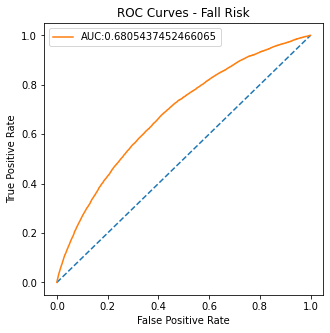

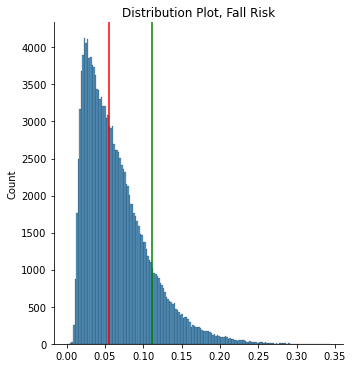

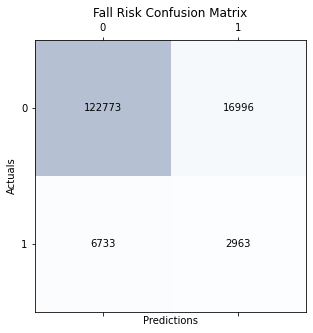

Median (%): 5.56887831911769
Prediction Threshold - 2 times risk (%): 11.13775663823538
Model Accuracy (%): 84.12404241795738
Model Recall (%): 30.558993399339933


In [47]:
evaluation(y_test, X_test, lr_pipe, "Fall Risk")

In [48]:
coef_df = pd.DataFrame(data={'coefficient': lr_pipe['logistic_regression'].coef_.reshape(20,)},
                       index=df_clean.columns[:-1]).sort_values(by=['coefficient'], ascending=False)
display(coef_df)

,coefficient
age,0.485260
hearing_aid2293,0.381914
ppl_in_household709,0.144834
visual_impair6148,0.105940
mild_depress_age20434,0.100800
employed6142,0.100658
household_income738,0.071043
sex31,0.063836
family_parki20107,0.059661
family_severe_depression20107,0.030460


In [15]:
# evaluation(y_test, X_test, nb_pipe, "Naive Bayes")

In [16]:
# evaluation(y_test, X_test, rf_pipe, "Random Forest")

### Model Tunning

In [17]:
# from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold

In [18]:
# Find the best classweight - Optimize F1 Score, Best_Result = class_weight={0: 0.09, 1: 0.91}

# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.transform(X_test)

# lr_clf = LogisticRegression()

# weights = np.linspace(0.0,0.99,100)
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator=lr_clf, 
#                           param_grid= param_grid,
#                           cv=5, 
#                           scoring='f1', 
#                           verbose=2).fit(X_train_scaled, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)

# gridsearch.best_estimator_

### Export Model and Test Model

In [19]:
import pickle
import json

In [20]:
# pickle.dump(lr_pipe, open('model.pkl', 'wb'))

In [21]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [22]:
with open("test_instance.json", "r") as f:
    data = json.load(f)
    
testing_df = pd.DataFrame([data])
display(testing_df)

,ww_age,sex31,height50,own_rent680,ppl_in_household709,household_income738,grad_age845,alcohol_freq1558,health_rating2178,disability2188,past_fall2296,operation2415,hearing_aid2293,visual_impair6148,employed6142,mild_depress_age20434,BMI21001,family_dementia20107,family_parki20107,family_severe_depression20107
0,87.0,0.0,163,1.0,4.0,4.0,18.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,22.9373,0.0,0.0,0.0


In [23]:
test_pred = pickled_model.predict_proba(testing_df)[0][1]
print(f"The test instance prediction result (%): {test_pred*100} ")

The test instance prediction result (%): 17.99313896861753 
